In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/wind-speed-prediction-dataset/wind_dataset.csv')

# Display the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


In [2]:
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [3]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the number of missing values in each column
print(missing_values)


DATE         0
WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64


In [4]:
# Display summary statistics of numerical columns
summary_stats = df.describe()

# Display the summary statistics
print(summary_stats)


              WIND          IND         RAIN        IND.1        T.MAX  \
count  6574.000000  6574.000000  6574.000000  6513.000000  5953.000000   
mean      9.796834     0.391542     1.885169     0.356364    13.339123   
std       4.977272     1.179092     4.030529     1.128552     4.890546   
min       0.000000     0.000000     0.000000     0.000000    -0.100000   
25%       6.000000     0.000000     0.000000     0.000000     9.600000   
50%       9.210000     0.000000     0.200000     0.000000    13.300000   
75%      12.960000     0.000000     2.000000     0.000000    17.200000   
max      30.370000     4.000000    67.000000     4.000000    26.800000   

             IND.2        T.MIN      T.MIN.G  
count  6513.000000  5900.000000  6214.000000  
mean      0.464456     6.411678     2.736547  
std       1.177571     4.637243     5.569175  
min       0.000000   -11.500000   -14.400000  
25%       0.000000     3.000000    -1.000000  
50%       0.000000     6.500000     3.000000  
75% 

**How is the distribution of the target variable 'WIND'?**

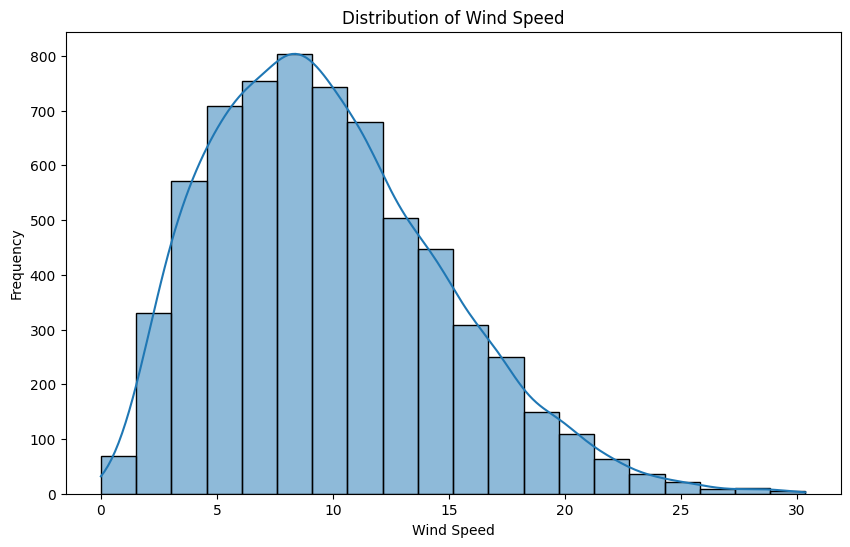

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable 'WIND'
plt.figure(figsize=(10, 6))
sns.histplot(df['WIND'], bins=20, kde=True)
plt.title('Distribution of Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.show()


**How does the wind speed vary with other weather features?**

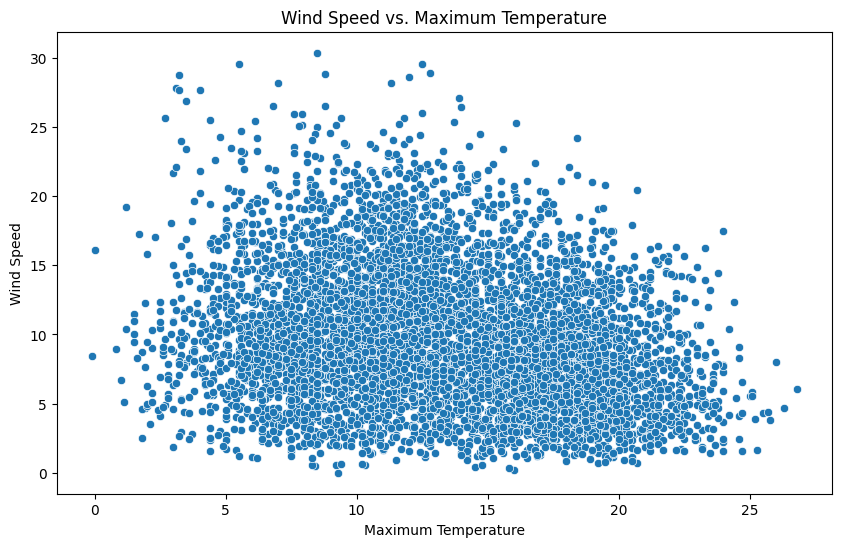

In [6]:
# Scatter plot of Wind Speed vs. T.MAX (Maximum Temperature)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='T.MAX', y='WIND', data=df)
plt.title('Wind Speed vs. Maximum Temperature')
plt.xlabel('Maximum Temperature')
plt.ylabel('Wind Speed')
plt.show()


**What is the distribution of different wind indices (IND and IND.1)?**

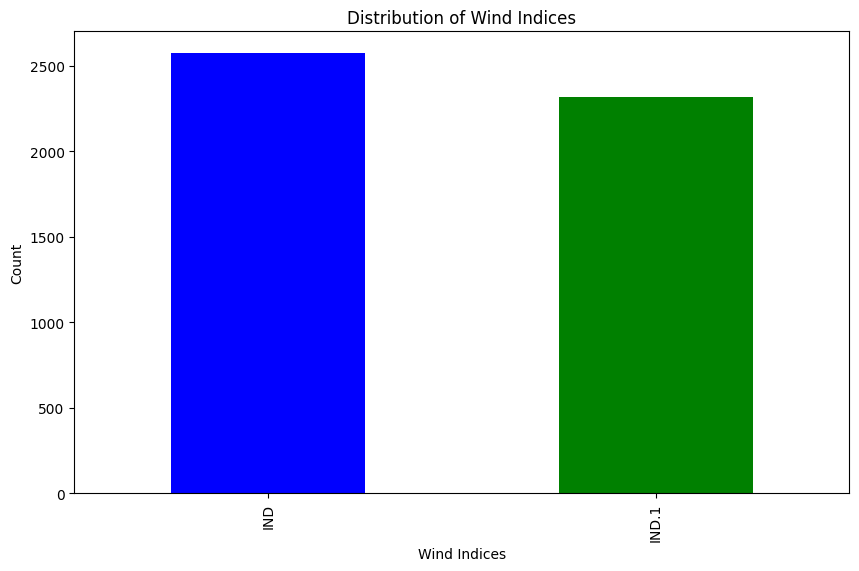

In [7]:
# Bar plot for the distribution of wind indices
plt.figure(figsize=(10, 6))
df[['IND', 'IND.1']].sum().plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of Wind Indices')
plt.xlabel('Wind Indices')
plt.ylabel('Count')
plt.show()


**What is the distribution of the categorical variable IND.2?**

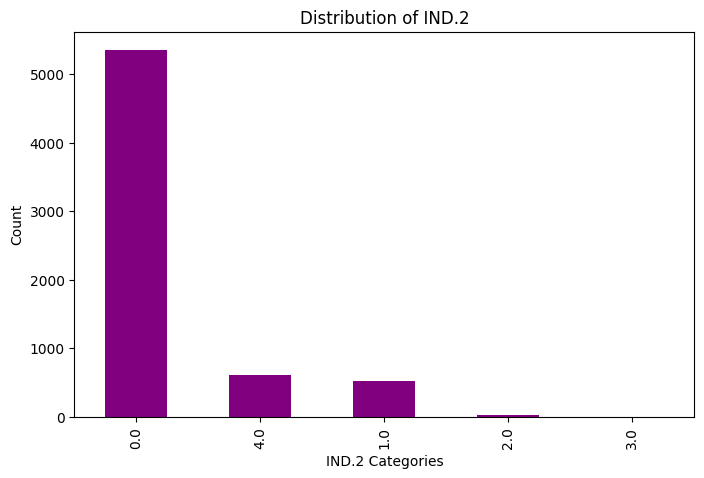

In [8]:
# Bar plot for the distribution of IND.2
plt.figure(figsize=(8, 5))
df['IND.2'].value_counts().plot(kind='bar', color='purple')
plt.title('Distribution of IND.2')
plt.xlabel('IND.2 Categories')
plt.ylabel('Count')
plt.show()


**How does the wind speed vary with different values of IND.2?**

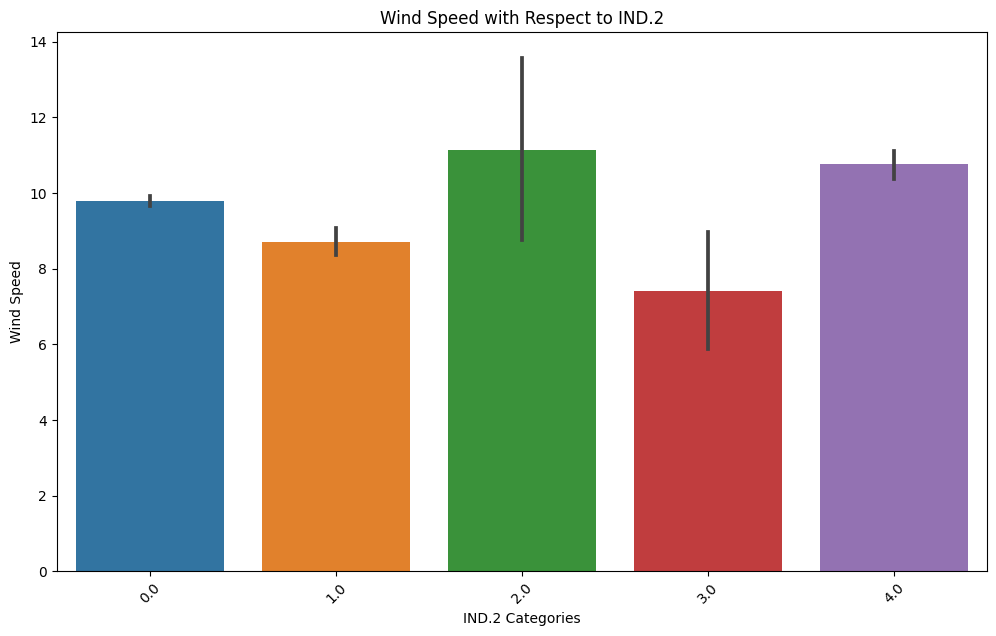

In [9]:
# Bar plot for Wind Speed with respect to IND.2
plt.figure(figsize=(12, 7))
sns.barplot(x='IND.2', y='WIND', data=df)
plt.title('Wind Speed with Respect to IND.2')
plt.xlabel('IND.2 Categories')
plt.ylabel('Wind Speed')
plt.xticks(rotation=45)
plt.show()


**What is the average wind speed for each value of IND.1?**

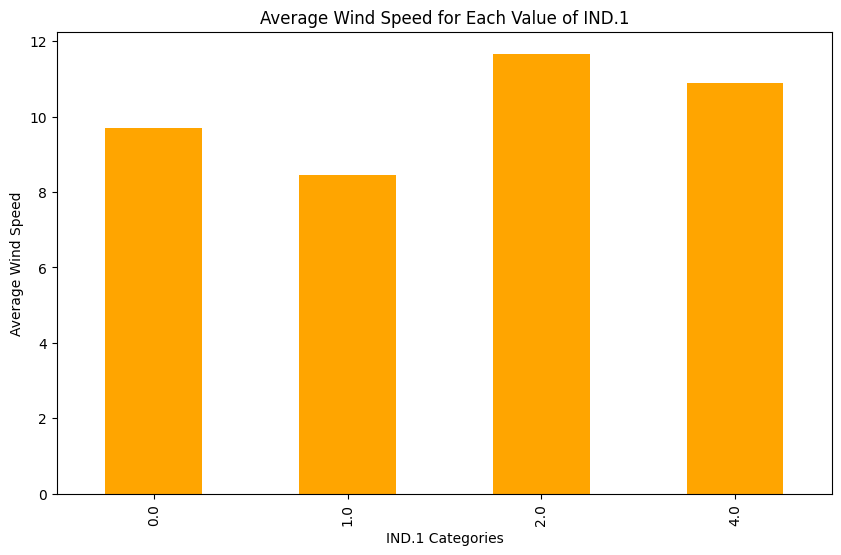

In [10]:
# Bar plot for Average Wind Speed with respect to IND.1
plt.figure(figsize=(10, 6))
df.groupby('IND.1')['WIND'].mean().plot(kind='bar', color='orange')
plt.title('Average Wind Speed for Each Value of IND.1')
plt.xlabel('IND.1 Categories')
plt.ylabel('Average Wind Speed')
plt.show()


**How does the wind speed vary with different values of IND?**

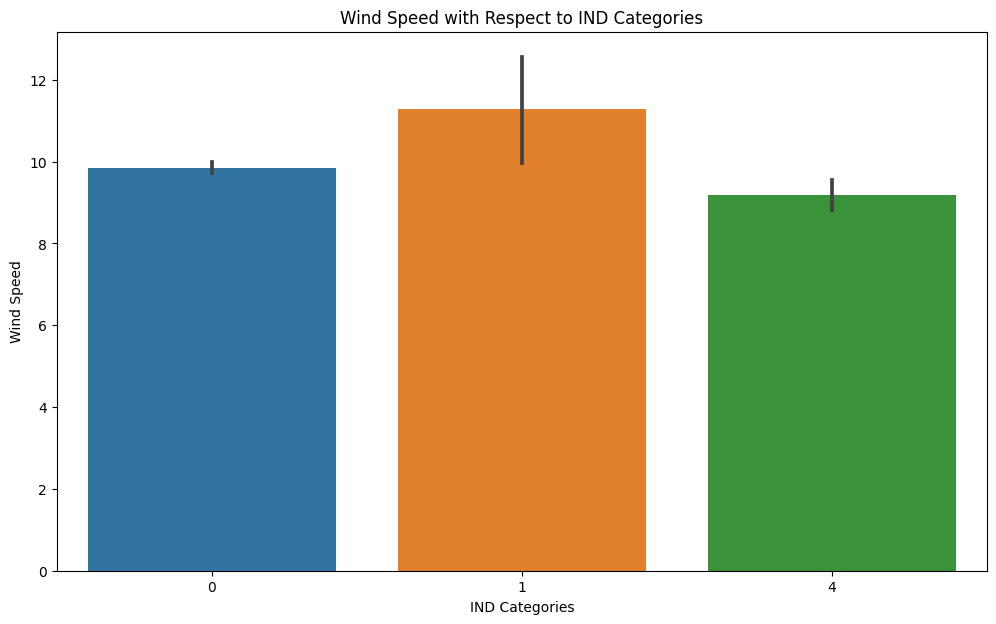

In [11]:
# Bar plot for Wind Speed with respect to IND categories
plt.figure(figsize=(12, 7))
sns.barplot(x='IND', y='WIND', data=df)
plt.title('Wind Speed with Respect to IND Categories')
plt.xlabel('IND Categories')
plt.ylabel('Wind Speed')
plt.show()


**How does the wind speed correlate with the minimum temperature (T.MIN)?**

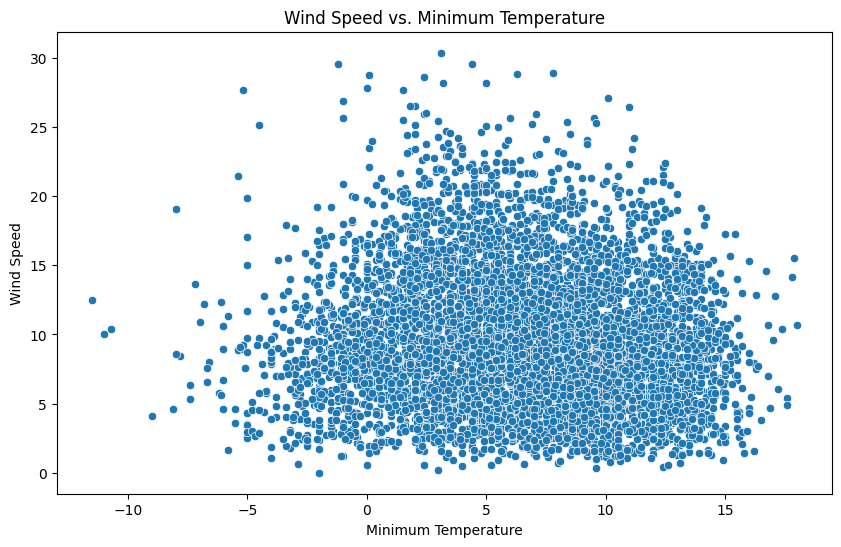

In [12]:
# Scatter plot of Wind Speed vs. Minimum Temperature (T.MIN)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='T.MIN', y='WIND', data=df)
plt.title('Wind Speed vs. Minimum Temperature')
plt.xlabel('Minimum Temperature')
plt.ylabel('Wind Speed')
plt.show()


**What is the relationship between wind speed and rainfall (RAIN)?**

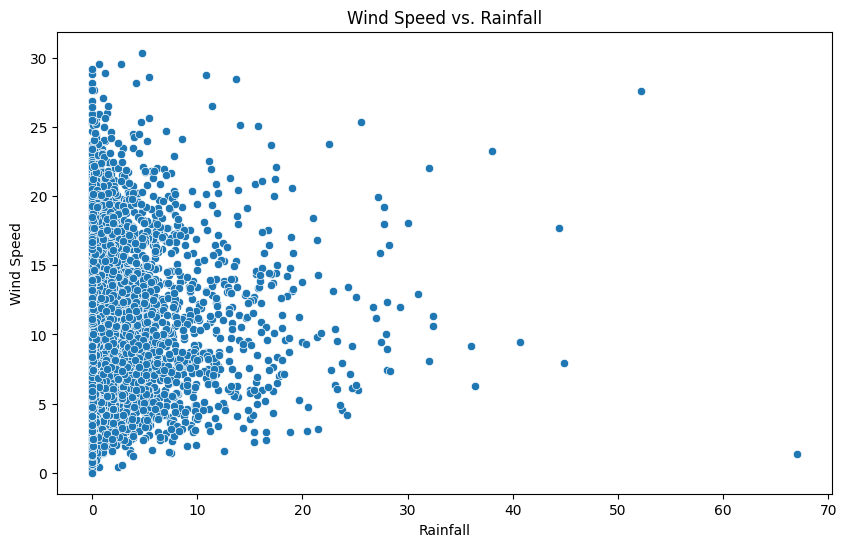

In [13]:
# Scatter plot of Wind Speed vs. Rainfall
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RAIN', y='WIND', data=df)
plt.title('Wind Speed vs. Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Wind Speed')
plt.show()


**How does the wind speed vary with different wind indices (IND and IND.1)?**

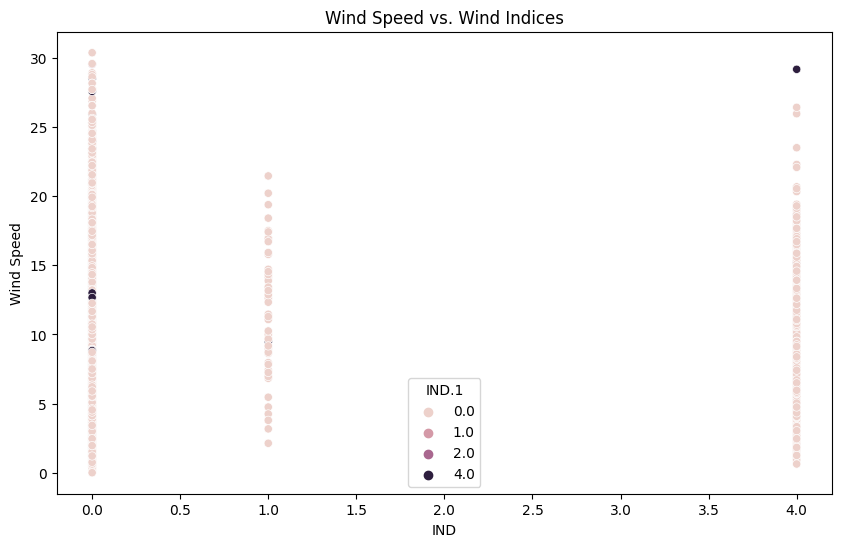

In [14]:
# Scatter plot of Wind Speed vs. Wind Indices (IND and IND.1)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IND', y='WIND', hue='IND.1', data=df)
plt.title('Wind Speed vs. Wind Indices')
plt.xlabel('IND')
plt.ylabel('Wind Speed')
plt.legend(title='IND.1')
plt.show()


**What is the scatter plot between wind speed and maximum temperature (T.MAX)?**

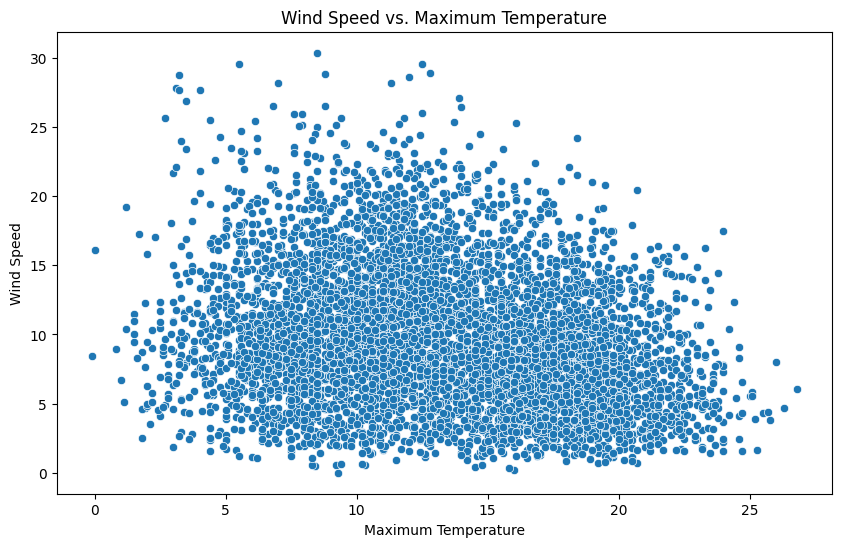

In [15]:
# Scatter plot of Wind Speed vs. Maximum Temperature (T.MAX)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='T.MAX', y='WIND', data=df)
plt.title('Wind Speed vs. Maximum Temperature')
plt.xlabel('Maximum Temperature')
plt.ylabel('Wind Speed')
plt.show()


**How does the wind speed vary with different values of IND.2?**

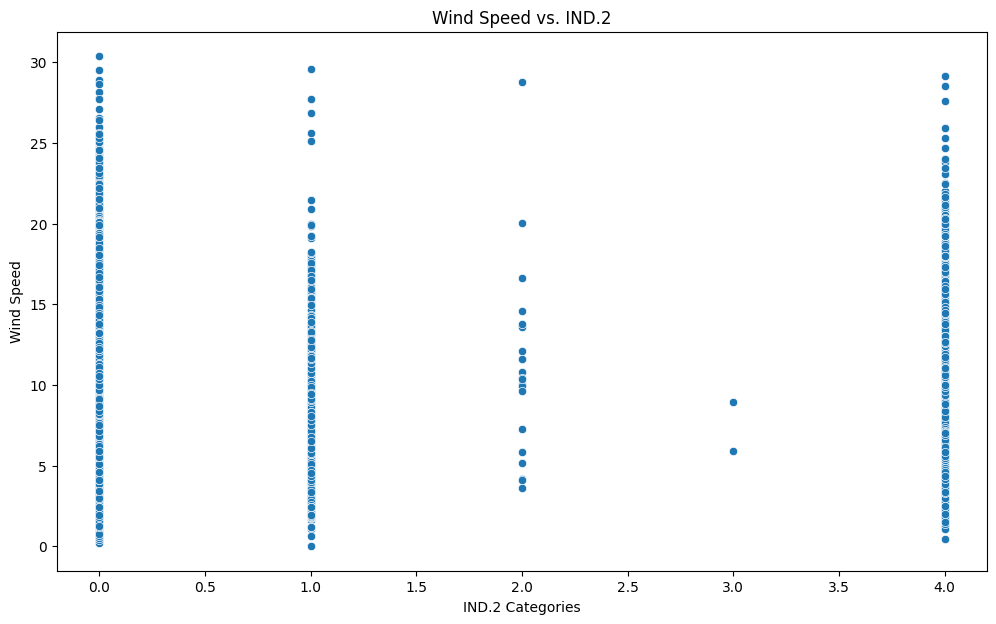

In [16]:
# Scatter plot of Wind Speed vs. IND.2
plt.figure(figsize=(12, 7))
sns.scatterplot(x='IND.2', y='WIND', data=df)
plt.title('Wind Speed vs. IND.2')
plt.xlabel('IND.2 Categories')
plt.ylabel('Wind Speed')
plt.show()


**How does wind speed correlate with different wind indices (IND and IND.1) using a scatter plot matrix?**

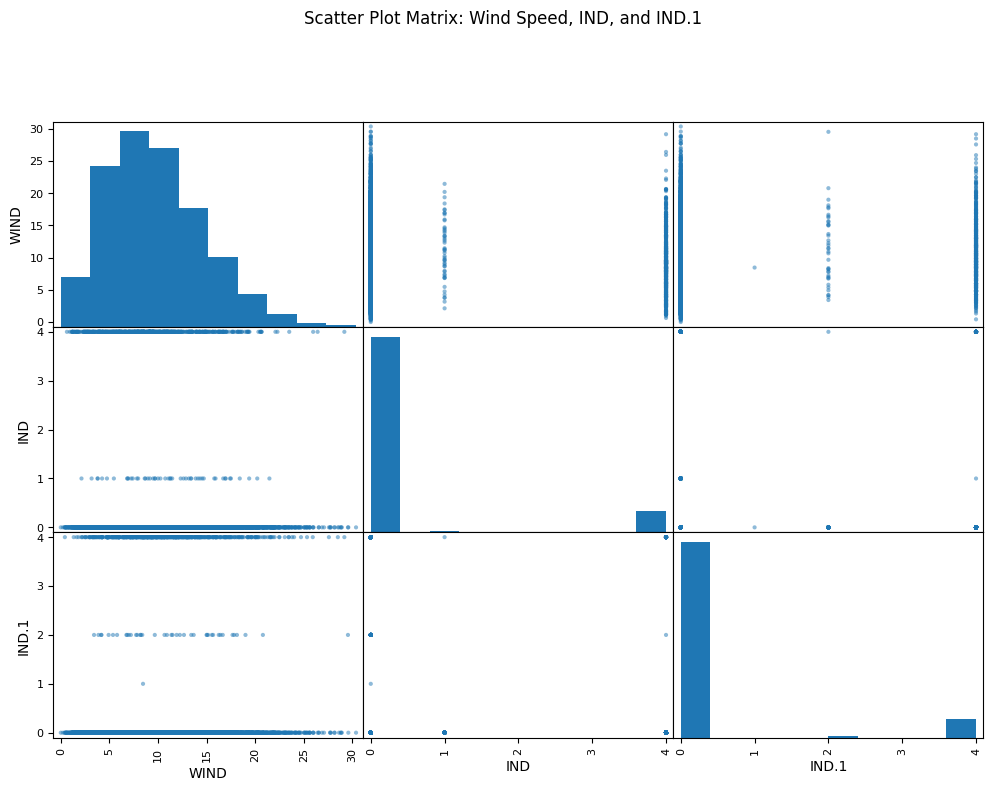

In [17]:
# Scatter plot matrix for Wind Speed, IND, and IND.1
scatter_matrix = pd.plotting.scatter_matrix(df[['WIND', 'IND', 'IND.1']], figsize=(12, 8), diagonal='hist')
plt.suptitle('Scatter Plot Matrix: Wind Speed, IND, and IND.1', y=1.02)
plt.show()


**What is the scatter plot between wind speed and minimum temperature (T.MIN.G)?**

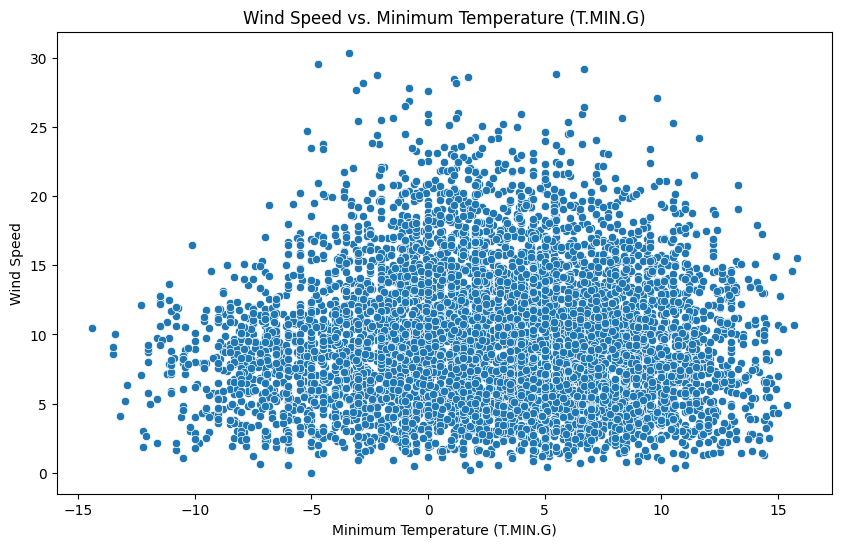

In [18]:
# Scatter plot of Wind Speed vs. Minimum Temperature (T.MIN.G)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='T.MIN.G', y='WIND', data=df)
plt.title('Wind Speed vs. Minimum Temperature (T.MIN.G)')
plt.xlabel('Minimum Temperature (T.MIN.G)')
plt.ylabel('Wind Speed')
plt.show()


**How does wind speed vary with different values of IND.1 using a scatter plot matrix?**

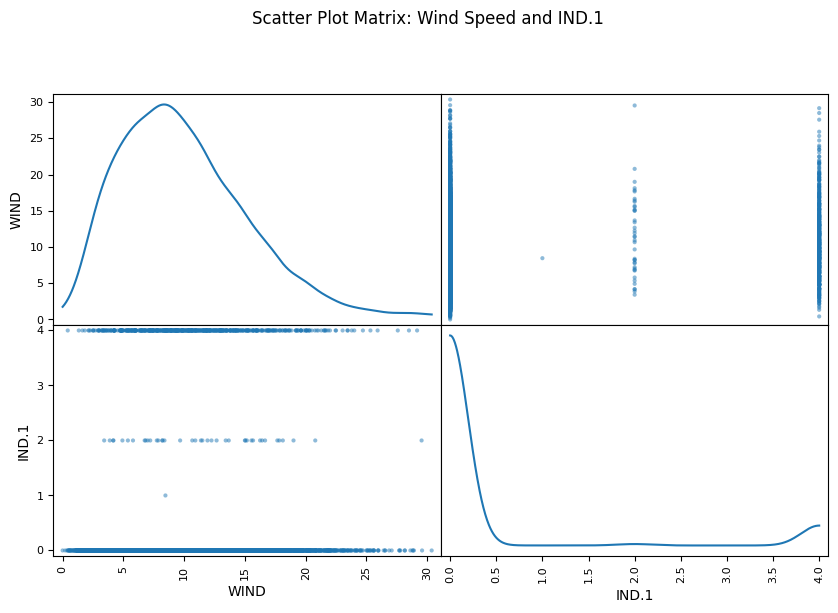

In [19]:
# Scatter plot matrix for Wind Speed and IND.1
scatter_matrix = pd.plotting.scatter_matrix(df[['WIND', 'IND.1']], figsize=(10, 6), diagonal='kde')
plt.suptitle('Scatter Plot Matrix: Wind Speed and IND.1', y=1.02)
plt.show()


**What is the scatter plot between wind speed and maximum temperature (T.MAX) colored by rainfall (RAIN)?**

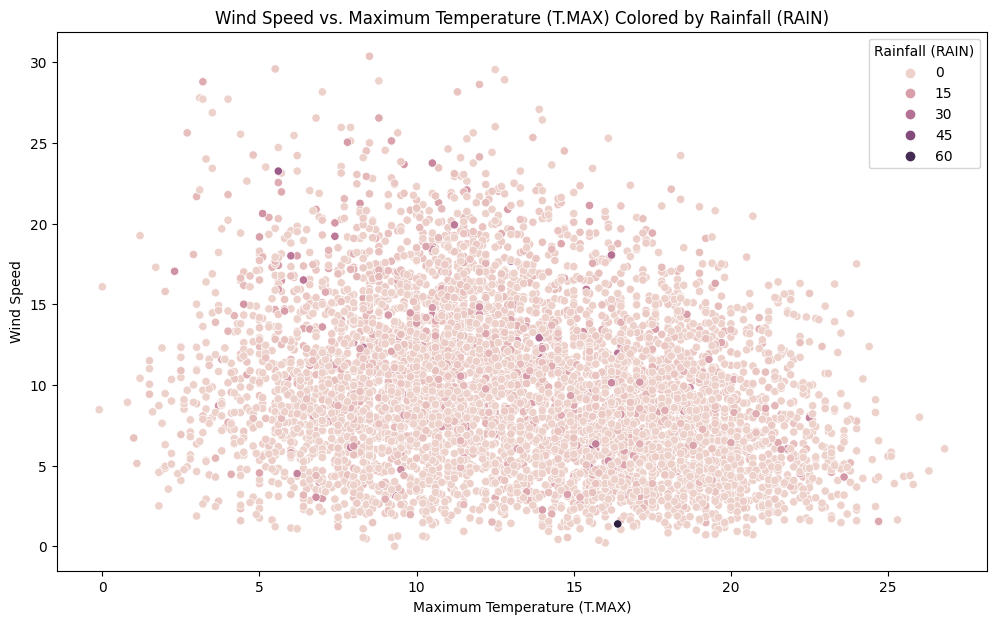

In [20]:
# Scatter plot of Wind Speed vs. Maximum Temperature (T.MAX) colored by Rainfall (RAIN)
plt.figure(figsize=(12, 7))
sns.scatterplot(x='T.MAX', y='WIND', hue='RAIN', data=df)
plt.title('Wind Speed vs. Maximum Temperature (T.MAX) Colored by Rainfall (RAIN)')
plt.xlabel('Maximum Temperature (T.MAX)')
plt.ylabel('Wind Speed')
plt.legend(title='Rainfall (RAIN)')
plt.show()


**How does wind speed correlate with different wind indices (IND and IND.1) using a pair plot?**

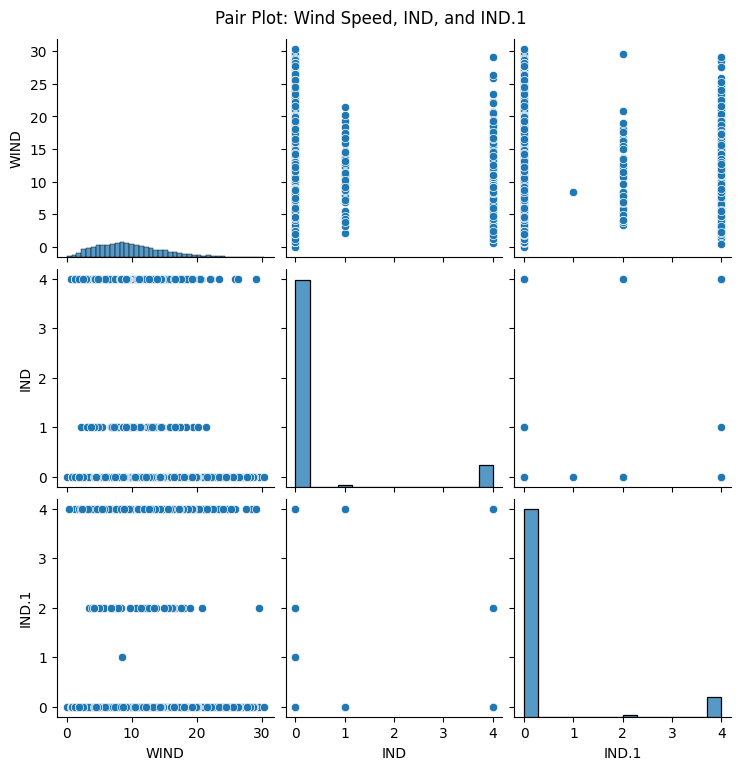

In [21]:
# Pair plot for Wind Speed, IND, and IND.1
sns.pairplot(df[['WIND', 'IND', 'IND.1']])
plt.suptitle('Pair Plot: Wind Speed, IND, and IND.1', y=1.02)
plt.show()


**What is the distribution of different categories in the 'IND.2' variable using a pie chart?**

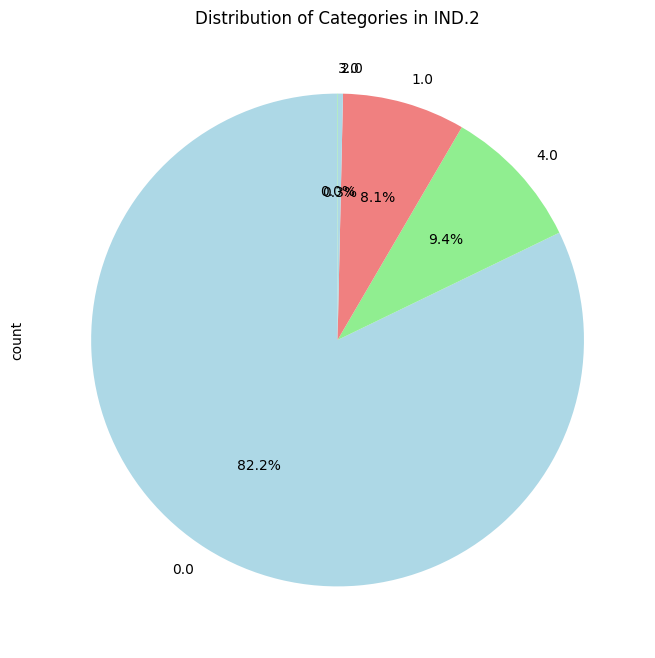

In [22]:
# Pie chart for the distribution of categories in IND.2
plt.figure(figsize=(8, 8))
df['IND.2'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Categories in IND.2')
plt.show()


**How is the distribution of different rainfall categories using a pie chart?**

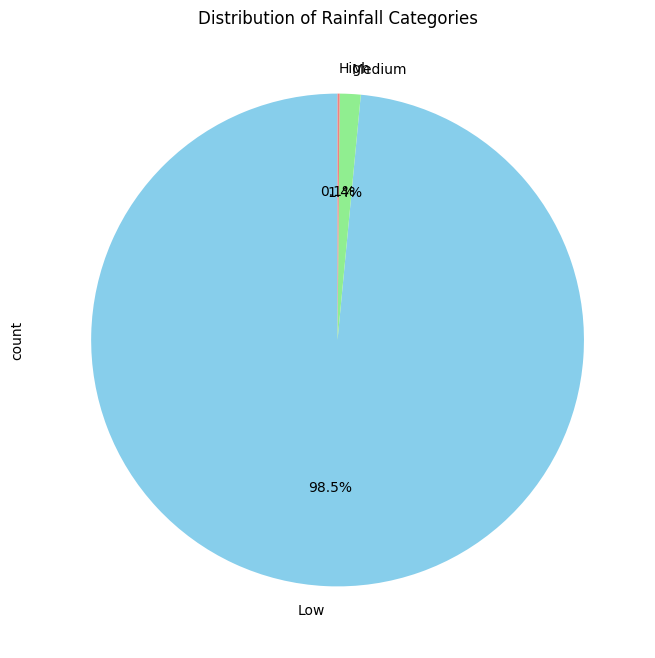

In [23]:
# Categorize Rainfall into bins (example: low, medium, high)
bins = [0, 20, 40, 100]
labels = ['Low', 'Medium', 'High']
df['Rainfall_Category'] = pd.cut(df['RAIN'], bins=bins, labels=labels)

# Pie chart for the distribution of Rainfall categories
plt.figure(figsize=(8, 8))
df['Rainfall_Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Rainfall Categories')
plt.show()


**What is the proportion of different wind indices (IND and IND.1) using pie charts?**

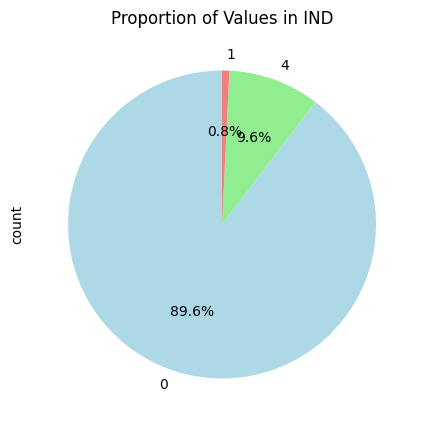

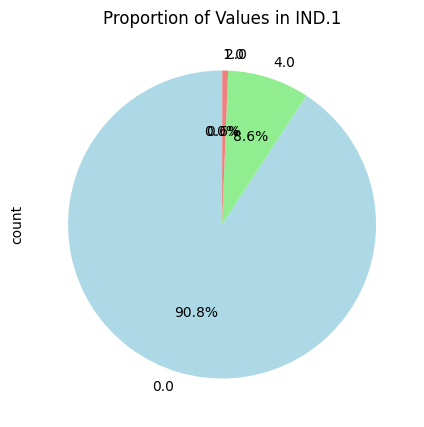

In [24]:
# Pie chart for the proportion of different values in IND
plt.figure(figsize=(10, 5))
df['IND'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Proportion of Values in IND')
plt.show()

# Pie chart for the proportion of different values in IND.1
plt.figure(figsize=(10, 5))
df['IND.1'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Proportion of Values in IND.1')
plt.show()


**What is the distribution of wind speed categories using a pie chart?**

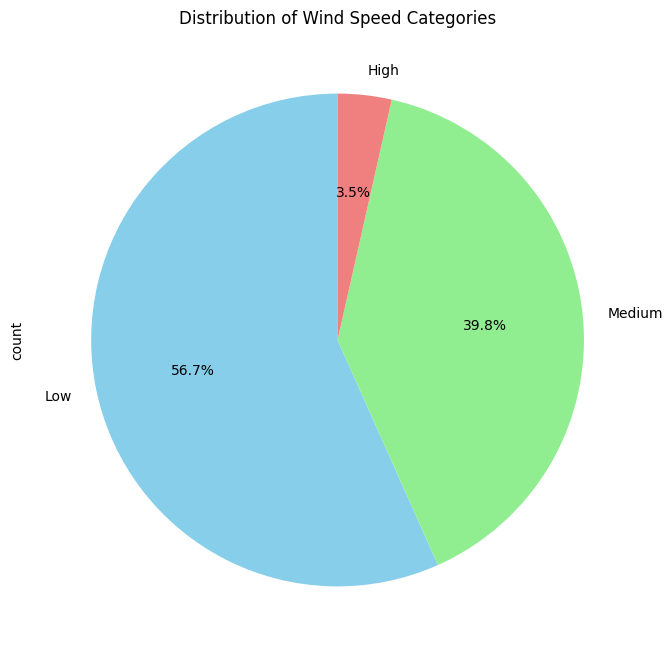

In [25]:
# Categorize Wind Speed into bins (example: low, medium, high)
bins = [0, 10, 20, 30]
labels = ['Low', 'Medium', 'High']
df['Wind_Speed_Category'] = pd.cut(df['WIND'], bins=bins, labels=labels)

# Pie chart for the distribution of Wind Speed categories
plt.figure(figsize=(8, 8))
df['Wind_Speed_Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Wind Speed Categories')
plt.show()


**How does wind speed vary with maximum temperature (T.MAX) and rainfall (RAIN) in a 3D scatter plot?**

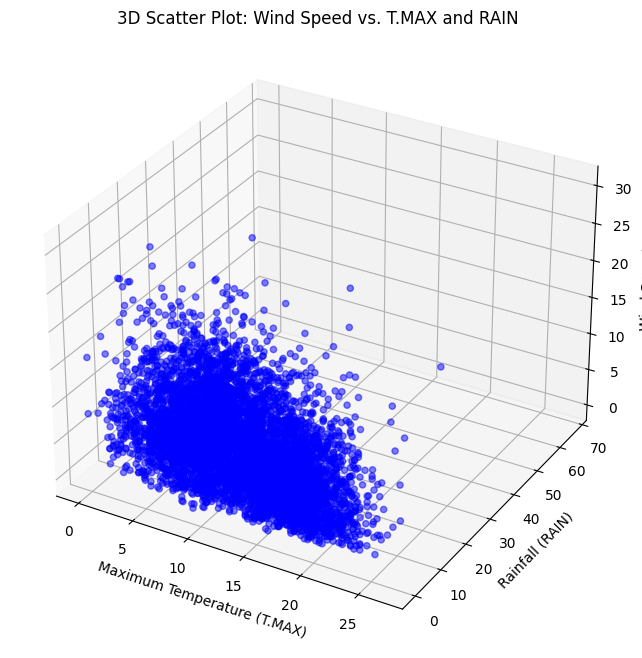

In [26]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot for Wind Speed, Maximum Temperature, and Rainfall
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['T.MAX'], df['RAIN'], df['WIND'], c='blue', marker='o', alpha=0.5)
ax.set_xlabel('Maximum Temperature (T.MAX)')
ax.set_ylabel('Rainfall (RAIN)')
ax.set_zlabel('Wind Speed')
ax.set_title('3D Scatter Plot: Wind Speed vs. T.MAX and RAIN')

plt.show()


**How does wind speed vary with minimum temperature (T.MIN) and rainfall (RAIN) in a 3D scatter plot?**

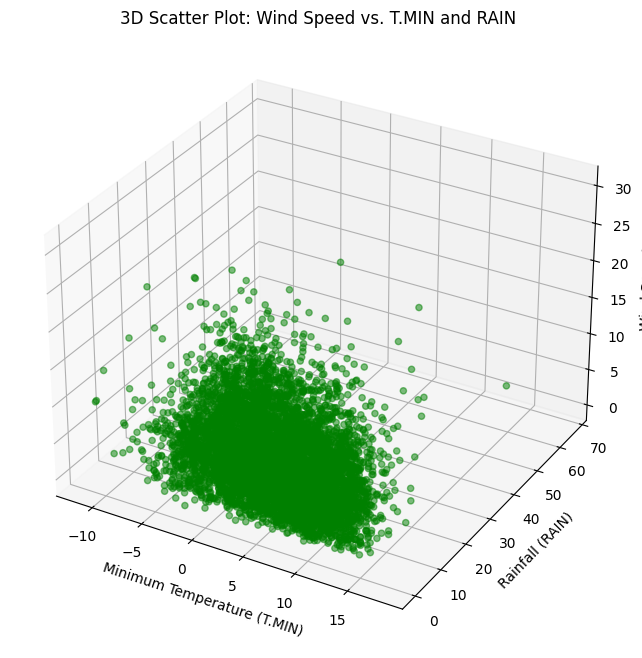

In [27]:
# Create a 3D scatter plot for Wind Speed, Minimum Temperature, and Rainfall
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['T.MIN'], df['RAIN'], df['WIND'], c='green', marker='o', alpha=0.5)
ax.set_xlabel('Minimum Temperature (T.MIN)')
ax.set_ylabel('Rainfall (RAIN)')
ax.set_zlabel('Wind Speed')
ax.set_title('3D Scatter Plot: Wind Speed vs. T.MIN and RAIN')

plt.show()


**How does wind speed vary with different wind indices (IND and IND.1) in a 3D scatter plot?**

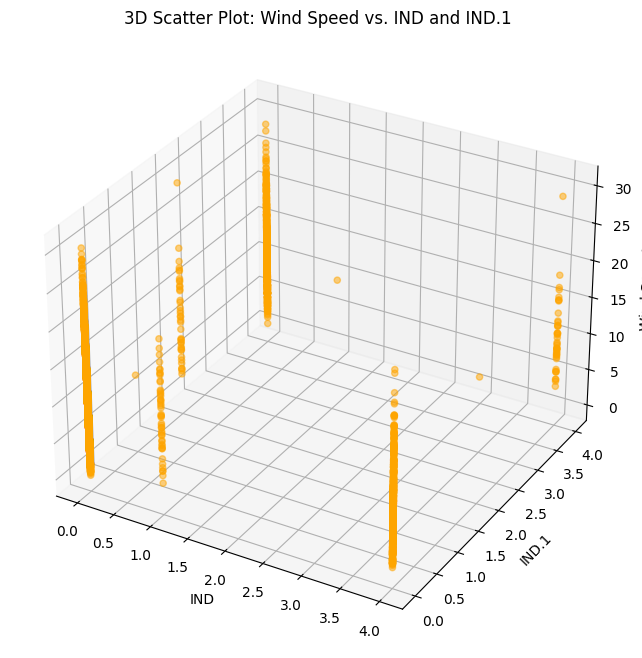

In [28]:
# Create a 3D scatter plot for Wind Speed, IND, and IND.1
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['IND'], df['IND.1'], df['WIND'], c='orange', marker='o', alpha=0.5)
ax.set_xlabel('IND')
ax.set_ylabel('IND.1')
ax.set_zlabel('Wind Speed')
ax.set_title('3D Scatter Plot: Wind Speed vs. IND and IND.1')

plt.show()


**How does wind speed vary with maximum temperature (T.MAX) and minimum temperature (T.MIN) in a 3D scatter plot?**

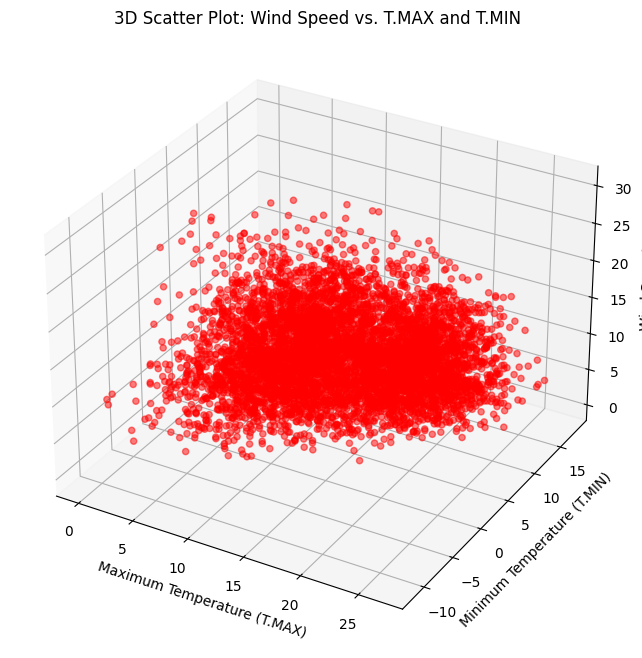

In [29]:
# Create a 3D scatter plot for Wind Speed, Maximum Temperature, and Minimum Temperature
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['T.MAX'], df['T.MIN'], df['WIND'], c='red', marker='o', alpha=0.5)
ax.set_xlabel('Maximum Temperature (T.MAX)')
ax.set_ylabel('Minimum Temperature (T.MIN)')
ax.set_zlabel('Wind Speed')
ax.set_title('3D Scatter Plot: Wind Speed vs. T.MAX and T.MIN')

plt.show()


**How does wind speed vary with different values of IND and maximum temperature (T.MAX) in a 3D scatter plot?**

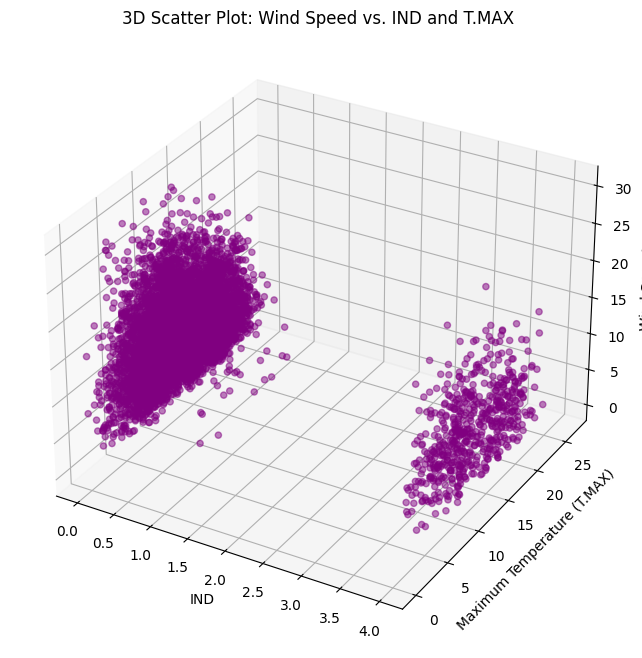

In [30]:
# Create a 3D scatter plot for Wind Speed, IND, and Maximum Temperature (T.MAX)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['IND'], df['T.MAX'], df['WIND'], c='purple', marker='o', alpha=0.5)
ax.set_xlabel('IND')
ax.set_ylabel('Maximum Temperature (T.MAX)')
ax.set_zlabel('Wind Speed')
ax.set_title('3D Scatter Plot: Wind Speed vs. IND and T.MAX')

plt.show()
